In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def h(x):
    if x<1 or x>1:
        y=0
    else:
        y=(np.cos(50*x)+np.sin(20*x))
    return y
hv=np.vectorize(h)

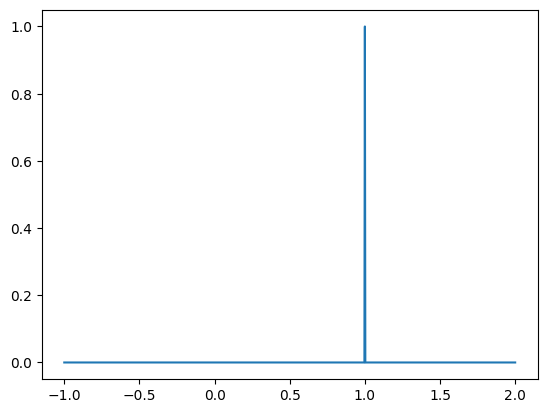

In [16]:
X=np.linspace(-1,2,num=1000)
plt.plot(X,hv(X))

In [12]:
def simple_greedy_search(func, start=0, N=100):
    x =start
    history=[]
    for i in range(N):
        history.append(x) #keep track of steps
        u=0.001 #np.random.rand() some junk
        xleft, xright=x-u, x+u #look left and right 
        yleft, yright=func(xleft), func(xright)
        if yleft>yright:
            x=xleft
        else:
            x=xright
    return x, func(x), history

In [13]:
def Simannl(search_space, func, T):
    scale =np.squrt(T) 
    start=np.random.choice(search_space)
    x=start+1
    cur=func[x]
    history=[x]
    for i in range(1000):
        prop = x + np.random.normal()*scale #.uniform(-1,1, size=1)*scale
        if prop >1 or prop <0 or np.log(np.random.rand())*T>(func(prop)-cur):
            prop=x
        x=prop
        cur=func(x)
        T=0.9*T #reduce by 10% each iteration
        history.append(x)
    return x, history